1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

In [18]:
x1 = np.random.normal(0,1,1000)
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2
df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df.T

0         1         2         3         4         5         6    \
x1  2.289888 -0.881610 -0.258475  1.474938 -0.587638 -1.261750 -0.576554   
x2  2.198957 -1.407692 -1.070744  0.610032  3.614051 -2.516641  2.718192   
x3  6.778734 -3.170912 -1.587695  3.559908  2.438776 -5.040140  1.565085   

         7         8         9      ...          990       991       992  \
x1  0.365044 -1.314528 -0.245529    ...     0.600129  1.442219  0.478996   
x2  2.903811  2.432011  0.704621    ...     6.729202 -0.763605 -2.659981   
x3  3.633900 -0.197046  0.213564    ...     7.929460  2.120834 -1.701989   

         993       994       995       996       997       998       999  
x1  1.041713 -0.883113 -0.490422 -0.720795  0.073243 -0.776342  0.255648  
x2  1.136972 -2.324730  1.777284 -2.820347 -6.047948 -2.702048 -3.449032  
x3  3.220399 -4.090955  0.796440 -4.261937 -5.901463 -4.254732 -2.937735  

[3 rows x 1000 columns]

In [19]:
#with rowvar=False, each column represents a variable
l, V = la.eig(np.cov(df, rowvar=False))
cov=np.cov(df,rowvar=False)
print(np.cov(df,rowvar=False).shape)
print("eigenvalues:",l)
print(V.shape)
print("covariance matrix:",np.cov(df,rowvar=False))
print("covariance matrix with eigendecomposition:",np.dot(V,np.dot(np.diag(l), la.inv(V))),'\n')

(3, 3)
eigenvalues: [2.85005956e+01+0.j 4.81107890e-16+0.j 1.87962183e+00+0.j]
(3, 3)
covariance matrix: [[ 1.02889808  1.23223803  3.29003419]
 [ 1.23223803 10.15338744 12.61786351]
 [ 3.29003419 12.61786351 19.19793189]]
covariance matrix with eigendecomposition: [[ 1.02889808+0.j  1.23223803+0.j  3.29003419+0.j]
 [ 1.23223803+0.j 10.15338744+0.j 12.61786351+0.j]
 [ 3.29003419+0.j 12.61786351+0.j 19.19793189+0.j]] 



In [20]:
U, spectrum, Vt = la.svd(df.T,full_matrices=False)
n = 1000
l_svd = spectrum**2/(n-1)
print(U.shape, np.diag(spectrum).shape,Vt.shape)
X=np.dot(U,np.dot(np.diag(spectrum), Vt))
print(X,'\n')
print("covariance with SVD:", np.dot(X,X.T)/(n-1),'\n')
print("spectrum:",spectrum,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l)
print ("SVD:",l_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V)
print ("SVD:",U)

(3, 3) (3, 3) (3, 1000)
[[ 2.28988841 -0.88161019 -0.25847533 ...  0.0732425  -0.77634202
   0.25564804]
 [ 2.19895686 -1.40769165 -1.07074439 ... -6.04794836 -2.70204794
  -3.44903151]
 [ 6.77873368 -3.17091203 -1.58769505 ... -5.90146335 -4.25473198
  -2.93773542]] 

covariance with SVD: [[ 1.03013695  1.2333184   3.2935923 ]
 [ 1.2333184  10.15432959 12.6209664 ]
 [ 3.2935923  12.6209664  19.208151  ]] 

spectrum: [1.68768798e+02 4.33511004e+01 7.43912035e-15] 

EIGENVALUES:
eigendecomposition: [2.85005956e+01+0.j 4.81107890e-16+0.j 1.87962183e+00+0.j]
SVD: [2.85114184e+01 1.88119911e+00 5.53959074e-32] 

EIGENVECTORS:
eigendecomposition: [[-0.12294024 -0.81649658  0.56410906]
 [-0.56794943 -0.40824829 -0.71467949]
 [-0.81382992  0.40824829  0.41353863]]
SVD: [[-0.12302778  0.56408997 -0.81649658]
 [-0.56783853 -0.71476761 -0.40824829]
 [-0.81389408  0.41341233  0.40824829]]


Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) 90% fo the total variability is exlained.

In [21]:
print ("cov.trace():", cov.trace())
Lambda=np.diag(l)
print ("Lambda.trace():", Lambda.trace())
print("eigenvalues:",l)#not ordered
print("singular values:",spectrum)#ordered
thresold=0.99
i=0
variability=0
while variability<thresold:
    variability += spectrum[i]/spectrum.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)
#print (spectrum[0]/spectrum.sum())
#print (l[0]/l.sum())
#print (spectrum[1]/spectrum.sum())
#print (l[2]/l.sum())



cov.trace(): 30.38021741567301
Lambda.trace(): (30.380217415673023+0j)
eigenvalues: [2.85005956e+01+0.j 4.81107890e-16+0.j 1.87962183e+00+0.j]
singular values: [1.68768798e+02 4.33511004e+01 7.43912035e-15]
number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 1.0


In [22]:
df_rotated=np.dot(df,U)
#print(df_rotated)
df_rotated=pd.DataFrame(df_rotated)
df_rotated

0         1             2
0    -7.047544  2.522372 -3.349500e-15
1     3.488591 -0.802029  1.255096e-15
2     1.932025 -0.036843  4.050354e-16
3    -3.425247  1.867677 -1.960830e-15
4    -3.964807 -1.906467  5.813637e-16
5     5.686416 -0.996583  1.909645e-15
6    -2.746376 -1.621079  5.056574e-16
7    -4.651416 -0.367333 -7.193637e-16
8    -1.058891 -2.561296  1.519807e-15
9    -0.543723 -0.553851  2.803900e-16
10    0.755586 -0.762965  7.094625e-16
11   -7.064306  0.171039 -1.512702e-15
12    2.472588 -2.639476  2.357278e-15
13    2.612325  1.328275 -4.070869e-16
14   -7.509786 -1.752010 -3.988762e-16
15   -1.801466  0.496929 -6.807505e-16
16    5.522043 -0.341450  1.343378e-15
17   -6.717514 -3.385231  1.401829e-15
18   -2.897114 -0.155155 -3.132872e-16
19    4.635940 -1.018570  1.816474e-15
20    5.351079 -1.366797  2.262310e-15
21   -2.468312 -0.717501  9.749743e-18
22   -2.638175  0.397471 -6.967023e-16
23   -6.481088 -2.219978  3.531197e-16
24    7.023126  1.056720  8.273527e-16
25    4.342730  1.459074 -2.884423e-17
26    2.425421  1.037132 -2.022956e-16
27   -3.648751 -1.705557  3.985338e-16
28   -3.560170 -0.518270 -2.745704e-16
29    0.735734  2.624743 -1.707289e-15
..         ...       ...           ...
970 -10.005937 -2.353521 -1.042058e-16
971   6.859826  0.649227  1.166450e-15
972   3.044081  1.542832 -6.458257e-16
973  -5.552254  0.168583 -1.316625e-15
974  -8.641524  0.544226 -1.864848e-15
975  -3.100356  1.371703 -1.468723e-15
976  -3.335760 -1.170031  4.154423e-16
977  -0.380213  2.968983 -2.159973e-15
978  -4.382170  1.741583 -2.102511e-15
979  -8.370444  2.312532 -3.315785e-15
980 -10.489922  0.014877 -1.905145e-15
981  -3.844736  2.166652 -2.247025e-15
982  -6.014937  1.551220 -2.380394e-15
983   0.878213  1.420715 -8.297266e-16
984   4.080262 -0.047308  8.085486e-16
985 -10.305065 -0.066814 -1.585693e-15
986  -5.983574 -1.237798 -5.130855e-17
987   1.559466 -0.850517  8.162104e-16
988  -1.013639 -0.481157  1.810269e-16
989   7.283520  2.226902 -3.802927e-16
990 -10.348673 -1.193152 -1.020468e-15
991  -1.469963  2.236120 -1.731361e-15
992   2.836749  1.467842 -4.924236e-16
993  -3.394839  1.106302 -1.482279e-15
994   4.758323 -0.527765  1.413065e-15
995  -1.597093 -1.217729  5.138369e-16
996   5.158945 -0.152637  1.041320e-15
997   8.228413  1.924455  3.068069e-16
998   5.092740 -0.265549  1.487784e-15
999   4.318047  1.394968  2.919967e-17

[1000 rows x 3 columns]

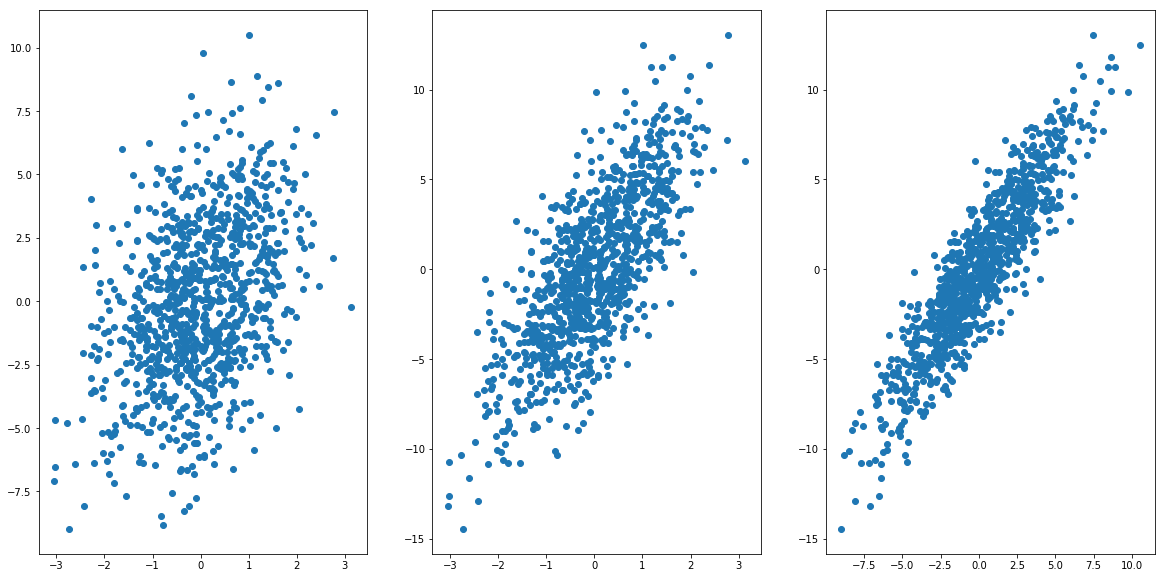

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df.iloc[:,0],df.iloc[:,1])
ax2.scatter(df.iloc[:,0],df.iloc[:,2])
ax3.scatter(df.iloc[:,1],df.iloc[:,2])

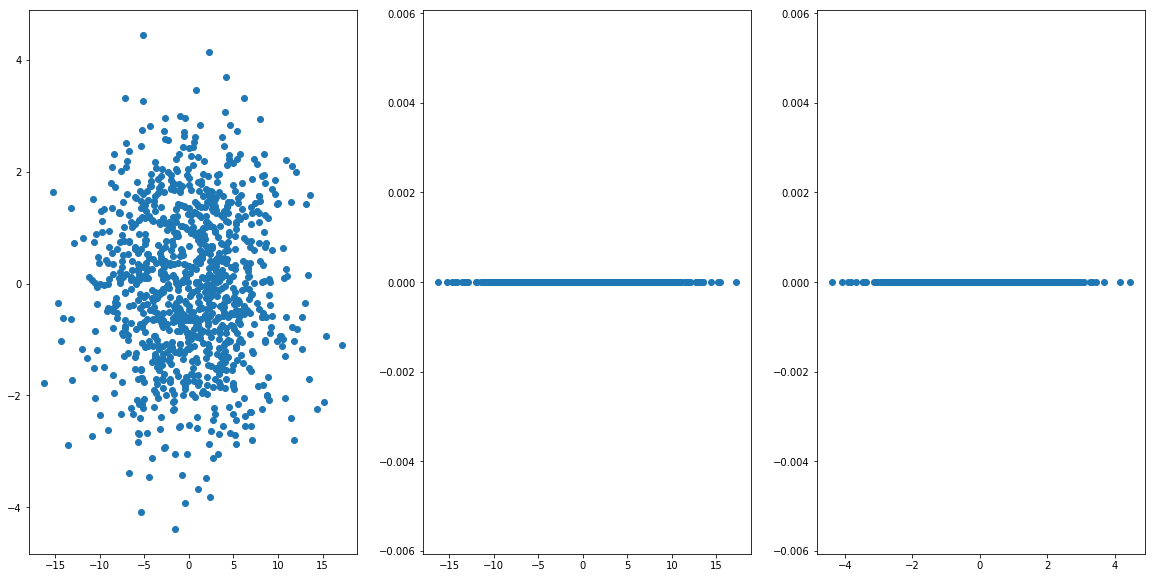

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax2.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax3.scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])

Text(0.5,1,'new 1 vs 2')

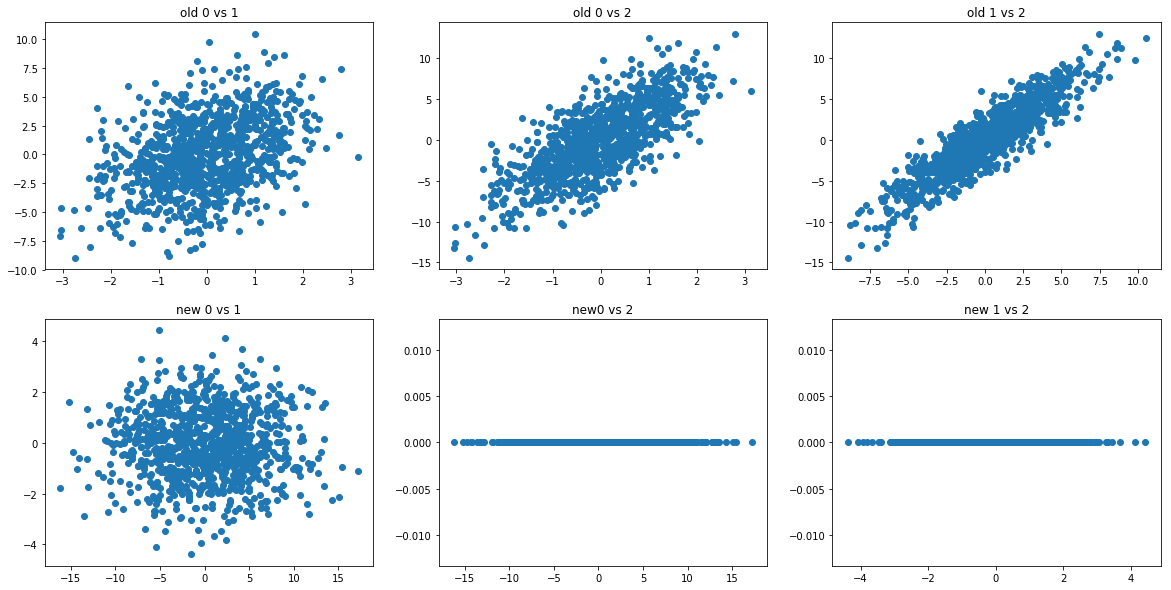

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df.iloc[:,0],df.iloc[:,1])
ax[0,1].scatter(df.iloc[:,0],df.iloc[:,2])
ax[0,2].scatter(df.iloc[:,1],df.iloc[:,2])
ax[1,0].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax[1,1].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax[1,2].scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])
ax[0,0].set_title("old {} vs {}".format(0,1))
ax[0,1].set_title("old {} vs {}".format(0,2))
ax[0,2].set_title("old {} vs {}".format(1,2))
ax[1,0].set_title("new {} vs {}".format(0,1))
ax[1,1].set_title("new{} vs {}".format(0,2))
ax[1,2].set_title("new {} vs {}".format(1,2))

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [11]:
noise1=np.zeros((1000))
noise2=np.zeros((1000))

for i in range(10):
    sd1=np.random.uniform(0.01,0.03)
    sd2=np.random.uniform(0.01,0.06)
    noise1 = noise1 + np.random.normal(0,sd1,1000)
    noise2 = noise2 + np.random.normal(0,sd2,1000)
    #print(s1)
    
x1 = np.random.normal(0,1,1000) + noise1
x2 = x1 + np.random.normal(0,3,1000) + noise2
#print(x1.shape)
x3 = 2*x1 + x2
df2 = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df2

x1        x2         x3
0    0.525207 -2.758229  -1.707815
1   -0.250558 -4.335247  -4.836364
2    0.677450 -3.048474  -1.693574
3   -2.169995 -2.838750  -7.178740
4   -0.634158 -1.791411  -3.059726
5   -0.210913 -2.980417  -3.402242
6    1.584660 -0.440187   2.729133
7    0.079578  3.231759   3.390914
8    1.330275  3.104153   5.764703
9   -0.162359  4.487511   4.162794
10   1.427669 -0.647790   2.207548
11   1.172340  4.003495   6.348175
12  -0.995957  0.433366  -1.558547
13  -0.037382 -2.177236  -2.251999
14   0.768843  3.044784   4.582469
15   0.997242  4.193309   6.187792
16   0.652965  5.156845   6.462774
17   0.954630  1.045900   2.955159
18  -1.201687 -1.045862  -3.449235
19  -0.188261 -3.021269  -3.397791
20   1.621541 -3.551020  -0.307937
21  -1.199018 -1.255346  -3.653381
22   0.223430  0.751565   1.198425
23   0.154070 -2.813637  -2.505498
24  -0.332180 -2.942590  -3.606950
25   0.335918 -4.397998  -3.726162
26  -1.195528  4.546199   2.155142
27  -0.746004 -2.734378  -4.226386
28   1.455935  2.339089   5.250959
29   2.038217 -1.351779   2.724654
..        ...       ...        ...
970  0.634580 -2.526997  -1.257837
971  0.542529  0.479642   1.564700
972  0.809007  3.829394   5.447408
973 -0.427432 -4.621816  -5.476681
974  0.765660  3.948730   5.480051
975  0.469134 -3.383248  -2.444980
976 -1.155419 -5.417594  -7.728432
977  0.879932 -0.763083   0.996780
978  0.007868  0.593332   0.609067
979  1.229522  8.659476  11.118519
980  0.726502 -0.332177   1.120827
981 -0.426442 -4.842128  -5.695011
982  0.174261 -4.043117  -3.694596
983 -0.007599  2.465285   2.450086
984 -1.290192 -5.305863  -7.886248
985  1.759586  2.827670   6.346841
986 -0.550326  4.499477   3.398825
987  1.026337  1.921303   3.973977
988 -1.601715 -1.857568  -5.060999
989 -0.750877 -0.122404  -1.624157
990  1.506439  2.067048   5.079925
991 -1.411549 -1.322199  -4.145297
992  2.283175  4.330327   8.896677
993 -0.823028 -2.073651  -3.719707
994  0.417547 -0.459712   0.375382
995  1.520371  4.648083   7.688826
996 -0.659170  0.495662  -0.822679
997 -0.149279  3.572784   3.274226
998  0.505072 -1.562381  -0.552237
999  0.444959 -0.885180   0.004738

[1000 rows x 3 columns]

In [12]:
cov2=np.cov(df2,rowvar=False)
l2, V2 = la.eig(cov2)
print("covariance matrix:",cov2,'\n')
print("covariance matrix shape:",cov2.shape,'\n')
print("eigenvalues:",l2,'\n')
print("eigenvectors:",V2,'\n')
print("eigenvectors shape:",V2.shape,'\n')
print("covariance matrix with eigendecomposition:",np.dot(V2,np.dot(np.diag(l2), la.inv(V2))),'\n')

covariance matrix: [[ 1.06746121  1.11198986  3.24691228]
 [ 1.11198986  9.96370533 12.18768506]
 [ 3.24691228 12.18768506 18.68150963]] 

covariance matrix shape: (3, 3) 

eigenvalues: [2.76748675e+01+0.j 8.38233939e-17+0.j 2.03780868e+00+0.j] 

eigenvectors: [[-0.12305209 -0.81649658  0.56408467]
 [-0.56780772 -0.40824829 -0.71479209]
 [-0.8139119   0.40824829  0.41337725]] 

eigenvectors shape: (3, 3) 

covariance matrix with eigendecomposition: [[ 1.06746121+0.j  1.11198986+0.j  3.24691228+0.j]
 [ 1.11198986+0.j  9.96370533+0.j 12.18768506+0.j]
 [ 3.24691228+0.j 12.18768506+0.j 18.68150963+0.j]] 



In [13]:
U2, spectrum2, Vt2 = la.svd(df2.T,full_matrices=False)
n = 1000
l2_svd = spectrum2**2/(n-1)
print(U2.shape, np.diag(spectrum2).shape,Vt2.shape)
X2=np.dot(U2,np.dot(np.diag(spectrum2), Vt2))
#print(X,'\n')
print("covariance matrix with SVD:", np.dot(X2,X2.T)/(n-1),'\n')
print("spectrum:",spectrum2,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l2)
print ("SVD:",l2_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V2)
print ("SVD:",U2)

(3, 3) (3, 3) (3, 1000)
covariance matrix with SVD: [[ 1.06754993  1.11304611  3.24814596]
 [ 1.11304611  9.97628101 12.20237323]
 [ 3.24814596 12.20237323 18.69866515]] 

spectrum: [1.66362722e+02 4.51242560e+01 4.85798525e-15] 

EIGENVALUES:
eigendecomposition: [2.76748675e+01+0.j 8.38233939e-17+0.j 2.03780868e+00+0.j]
SVD: [2.77042594e+01 2.03823671e+00 2.36236443e-32] 

EIGENVECTORS:
eigendecomposition: [[-0.12305209 -0.81649658  0.56408467]
 [-0.56780772 -0.40824829 -0.71479209]
 [-0.8139119   0.40824829  0.41337725]]
SVD: [[-0.12297409  0.56410168 -0.81649658]
 [-0.56790655 -0.71471357 -0.40824829]
 [-0.81385473  0.41348979  0.40824829]]


In [14]:
df2_rotated=np.dot(df2,U2)
#print(df_rotated)
df2_rotated=pd.DataFrame(df2_rotated)
df2_rotated

0         1             2
0     2.891742  1.561450 -2.115839e-16
1     6.428925  0.957332  1.755012e-16
2     3.026263  1.860661 -1.664406e-16
3     7.721449 -2.163540  1.112163e-15
4     3.585511 -0.342549  1.746073e-16
5     4.487466  0.604376  2.436781e-16
6    -2.166005  2.336985 -5.552412e-16
7    -4.604835 -0.862784 -1.827771e-16
8    -6.618089  0.915475 -8.491664e-16
9    -5.916431 -1.577600 -2.419350e-16
10   -1.604306  2.181133 -6.510148e-16
11   -7.584271  0.424872 -8.594573e-16
12    1.144797 -1.515997  4.442934e-16
13    3.073864  0.603834  1.381290e-16
14   -5.553165  0.152361 -7.102460e-16
15   -7.540007  0.124120 -7.005207e-16
16   -8.268663 -0.645037 -8.646638e-16
17   -3.116438  1.012917 -6.370719e-16
18    3.548904 -1.356605  3.851321e-16
19    4.504258  0.648192  3.878010e-16
20    2.067856  3.325347 -4.565971e-16
21    3.833689 -1.289791  6.015214e-16
22   -1.429638  0.084420 -1.523091e-16
23    3.618048  1.061858  9.827858e-18
24    4.647498  0.424289  2.313614e-16
25    5.488897  1.792070  1.177094e-16
26   -4.188769 -3.032500  1.337021e-16
27    5.084275 -0.214093  3.758404e-16
28   -5.780944  1.320735 -1.159081e-15
29   -1.700436  3.242513 -6.569291e-16
..         ...       ...           ...
970   2.380758  1.643944 -2.251660e-16
971  -1.612547  0.610223 -3.060339e-16
972  -6.707623 -0.028110 -3.735496e-16
973   7.134545  0.797608  4.088151e-16
974  -6.796631 -0.124356 -4.283039e-16
975   3.853536  1.671718 -9.563232e-17
976   9.508595  0.024626  9.105042e-16
977  -0.486083  1.453915 -3.456183e-16
978  -0.833616 -0.167781 -4.812476e-17
979 -14.117832 -0.898076 -9.188284e-16
980  -0.812886  1.110683 -2.766014e-16
981   7.437229  0.865349  5.576537e-16
982   5.281547  1.460294  2.298359e-16
983  -3.393131 -0.753174 -2.164139e-16
984   9.590154 -0.196511  9.218449e-16
985  -6.987642  1.595965 -6.206088e-16
986  -5.253756 -2.120897  7.376751e-17
987  -4.451573  0.848976 -4.885605e-16
988   5.370812 -1.668572  1.020061e-15
989   1.483680 -1.007660  2.966489e-16
990  -5.493464  1.472934 -6.164074e-16
991   4.298139 -1.565302  8.464380e-16
992  -9.980595  1.871685 -1.220887e-15
993   4.306152 -0.520266  2.779006e-16
994  -0.095780  0.719319 -1.772904e-16
995  -9.084230  0.714847 -5.572058e-16
996   0.469113 -1.066265  2.882179e-16
997  -4.675394 -1.283867  4.857379e-18
998   1.274617  1.173223 -1.545709e-16
999   0.444125  0.885611 -1.745650e-16

[1000 rows x 3 columns]

In [15]:
print ("cov2.trace():", cov2.trace(),'\n')
Lambda2=np.diag(l2)
print ("Lambda2.trace():", Lambda2.trace(),'\n')
print("eigenvalues:",l2,'\n')#not ordered
print("singular values:",spectrum2,'\n')#ordered
thresold=0.99
i=0
variability=0
#print(spectrum[0]**2)
while variability<thresold:
    variability += spectrum2[i]**2/(spectrum2**2).sum() #ad essere precisi dovrebbe essere questa la formula
    #variability += spectrum2[i]/spectrum2.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)

cov2.trace(): 29.712676172571094 

Lambda2.trace(): (29.71267617257108+0j) 

eigenvalues: [2.76748675e+01+0.j 8.38233939e-17+0.j 2.03780868e+00+0.j] 

singular values: [1.66362722e+02 4.51242560e+01 4.85798525e-15] 

number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 1.0


Text(0.5,1,'new 1 vs 2')

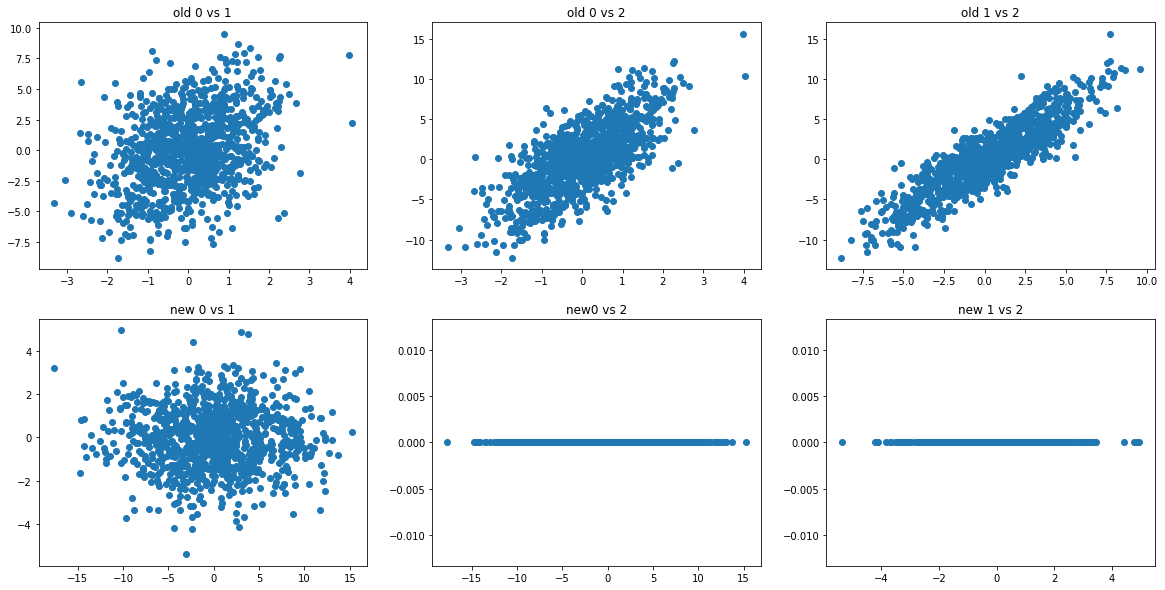

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df2.iloc[:,0],df2.iloc[:,1])
ax[0,1].scatter(df2.iloc[:,0],df2.iloc[:,2])
ax[0,2].scatter(df2.iloc[:,1],df2.iloc[:,2])
ax[1,0].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,1])
ax[1,1].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,2])
ax[1,2].scatter(df2_rotated.iloc[:,1],df2_rotated.iloc[:,2])
ax[0,0].set_title("old {} vs {}".format(0,1))
ax[0,1].set_title("old {} vs {}".format(0,2))
ax[0,2].set_title("old {} vs {}".format(1,2))
ax[1,0].set_title("new {} vs {}".format(0,1))
ax[1,1].set_title("new{} vs {}".format(0,2))
ax[1,2].set_title("new {} vs {}".format(1,2))

## RESULTS ARE PRATICALLY THE SAME, PCA IS USED ALSO FOR DENOISING
In [PCA](https://stats.stackexchange.com/questions/247260/principal-component-analysis-eliminate-noise-in-the-data) it is asserted that the noise should affects the smallest eigenvalues thus, keeping only the most relevant the noise is reduced

## NOISE IS LOW, otherwise no [meaningful info can be extracted ](http://www.dei.unipd.it/~rossi/courses/HumanData/HDA.html)

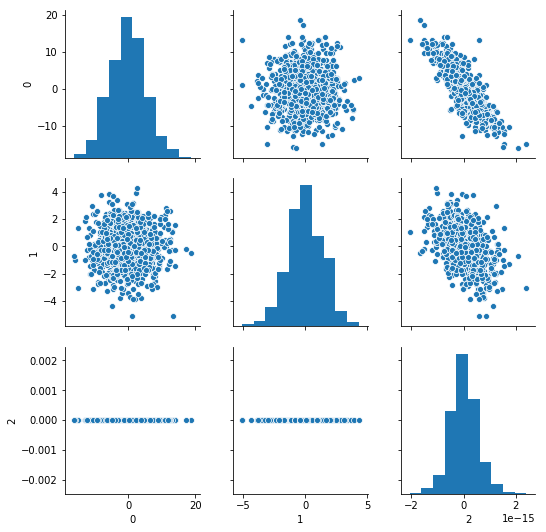

In [12]:
import seaborn as sns
sns.pairplot(df2_rotated)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


The steps are the follow:
* define armonic mote
* perform rotations trough [Rotation Matrix](https://en.wikipedia.org/wiki/Rotation_matrix)
* apply PCA using the same math above

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [3]:
magic = pd.read_csv('../data/magic04.data')

In [4]:
magic
magic.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
magic.loc[magic['category'] =='h', 'category'] = 0
magic.loc[magic['category'] =='g', 'category'] = 1
magic

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
5       48.2468   17.3565  3.0332  0.2529  0.1515    8.5730   38.0957   
6       26.7897   13.7595  2.5521  0.4236  0.2174   29.6339   20.4560   
7       96.2327   46.5165  4.1540  0.0779  0.0390  110.3550   85.0486   
8       46.7619   15.1993  2.5786  0.3377  0.1913   24.7548   43.8771   
9       62.7766   29.9104  3.3331  0.2475  0.1261  -33.9065   57.5848   
10      18.8562   16.4600  2.4385  0.5282  0.2933   25.1269   -6.5401   
11      45.6321   22.7100  3.0441  0.2213  0.1215  -18.3986  -20.6427   
12      33.1818   12.4655  2.4955  0.4696  0.2412  -17.0341  -22.0762   
13      60.4580   33.1061  3.1944  0.4679  0.2464   14.3000  -33.8765   
14      29.4741   22.4581  2.6258  0.3077  0.1740   18.1242   22.7035   
15      36.1741   17.6865  2.9460  0.2865  0.1591   -4.7746  -18.9697   
16      46.2915   16.0328  2.7756  0.3403  0.1920   49.9706   33.3653   
17      46.0588   18.7870  3.2217  0.2431  0.1504   49.2704   34.1066   
18      44.7394   15.6364  2.6380  0.3107  0.1715   14.0430   37.2246   
19      91.6423   71.8818  3.8484  0.0780  0.0430  -56.7107   72.3016   
20      86.0486   21.8287  3.3587  0.2369  0.1662  -58.7854   57.8212   
21      90.5299   17.8721  3.0330  0.2122  0.1080  -57.4170   84.6189   
22      20.3836    9.0462  2.3365  0.6359  0.3894   22.2700   12.9487   
23      87.2384   27.9350  2.8848  0.3155  0.1806  -18.2102   66.6867   
24     107.3380   29.1356  3.5265  0.1315  0.0683  -47.1175   89.5136   
25      27.2304   19.2817  2.6375  0.3710  0.2039   23.0406   23.3428   
26      26.7065   18.9070  2.6781  0.4281  0.2214    9.1616   18.6858   
27      23.5647    9.9926  2.2095  0.5679  0.3364   30.0056  -13.8665   
28      34.7486   19.2286  2.5629  0.3666  0.1984   30.3637  -16.3092   
29      50.4829   25.9699  3.3194  0.1941  0.1133   32.1193   39.0162   
...         ...       ...     ...     ...     ...       ...       ...   
18989   26.0277    7.4010  2.4223  0.6194  0.3791  -27.8670   14.0382   
18990   32.1547   12.5410  2.7593  0.4317  0.2167   31.6221   24.5785   
18991  169.0402   35.3614  3.2894  0.3349  0.1986 -162.2329   70.4636   
18992   18.8377    8.8786  2.5617  0.6039  0.3234    0.4589   15.5433   
18993  195.2309   67.0206  3.7669  0.1195  0.0677 -119.1863 -155.8811   
18994   67.7139   28.5831  3.2384  0.2050  0.1106 -133.6450   63.1391   
18995   29.8353   11.3519  2.4449  0.4890  0.2948    9.9236   -9.0429   
18996   18.0124   10.6746  2.5694  0.5768  0.2951  -23.3968   -9.2150   
18997  207.2530   75.8327  4.1476  0.0739  0.0371 -242.4960 -180.0290   
18998  172.2442   20.1926  2.9009  0.2887  0.1940  124.5990  112.9452   
18999   69.3556   31.9822  3.2231  0.3093  0.1744  -52.6569  -42.0622   
19000   57.1905   35.5095  2.7177  0.2337  0.1197  -48.5112  -54.2835   
19001  110.7140   26.8312  3.2212  0.1856  0.1247 -158.0625   73.2259   
19002   21.5189   15.4205  2.7328  0.5587  0.3117   -7.3668    9.2409   
19003   23.4293   11.3673  2.7001  0.3842  0.1890  -26.3784  -14.5363   
19004   23.8277   11.8989  2.4393  0.4655  0.2891   11.1013   11.5776   
19005   32.1454   13.8296  2.4844  0.5182  0.2761  -36.0633  -15.9648   
19006  115.2640   14.0075  2.8540  0.7544  0.4136  -88.2076 -117.4860   
19007  133.4950   40.1631  3.3050  0.1169  0.0602   84.1711  -81.3323   
19008   39.5223   18.6327  2.8341  0.2462  0.1414   24.1819   23.2190   
19009   32.4902   10.6723  2.4742  0.4664  0.2735  -27.0097  -21.1687   
19010   79.5528   44.9929  3.5488  0.1656  0.0900  -39.6213   53.7866   
19011   31.8373   13.8734  2.8251  0.4169  0.1988  -16.4919  -27.1

In [5]:
cov = np.cov(magic, rowvar=False)
l, V = np.linalg.eig(cov)


U, spectrum, Vt = np.linalg.svd(magic.T)
l_svd = spectrum**2/(magic.shape[0]-1)
V_svd = U

print ("Eigenvectors:\n")
print ("eigendecomposition:",V)
print ("SVD:",V_svd)
print ("Eigenvalues\n")
print ("eigendecomposition:",l)
print ("SVD:",l_svd)

Eigenvectors:

eigendecomposition: [[-3.27832326e-01 -1.34392048e-01  6.54885882e-02  8.63976494e-01
   9.45901411e-02  1.98585764e-02  3.38158939e-01 -3.20410520e-03
  -4.11021999e-03 -5.63650240e-04 -3.72259525e-05]
 [-1.13819215e-01 -5.38784953e-02 -1.90016485e-02  3.19760229e-01
  -1.97327301e-02 -2.32615631e-02 -9.38309100e-01  1.18928074e-03
  -1.33526103e-02  6.85069113e-04  5.57397891e-05]
 [-3.06095191e-03  6.59528203e-04  1.05912209e-03  6.93010197e-03
   2.65217615e-03 -1.33530275e-04 -1.08822367e-02 -2.00508447e-02
   9.27984824e-01 -3.71160030e-01 -2.23144358e-02]
 [ 9.27206105e-04 -2.58265085e-04 -5.10323582e-04 -2.60545273e-03
  -1.53915480e-03  3.47069664e-05  3.06287031e-03  3.37528550e-02
  -3.20335332e-01 -7.69762365e-01 -5.51082747e-01]
 [ 5.21958449e-04 -1.52748804e-04 -2.94585578e-04 -1.51268809e-03
  -9.19446955e-04  2.22081515e-05  1.81385988e-03  2.45302953e-02
  -1.86710788e-01 -5.18387901e-01  8.34148982e-01]
 [ 3.80728693e-01  6.93878694e-01 -5.40081629e-01 

In [6]:
#using svd ordered results
Lambda=np.diag(l)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))


Lambda [[6.57941290e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.85407324e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.01648252e+03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.32683292e+03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.10257200e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.33618585e+02 0.00000000e+00 0.00000000e+00
  0.00000

In [7]:
found_variability = l/np.sum(l)

print('variability per principal component:',found_variability)

variability per principal component: [4.40440170e-01 2.58000022e-01 1.34987714e-01 8.88210735e-02
 4.08519406e-02 2.90273686e-02 7.85476521e-03 1.04327463e-05
 5.77843929e-06 7.09234404e-07 2.57400996e-08]


In [9]:
magic_rotated=np.dot(magic,U)
#print(df_rotated)
magic_rotated=pd.DataFrame(magic_rotated)
magic_rotated

0           1           2           3          4          5   \
0     -205.138902   44.071688    5.626395  -18.291619  13.313614 -10.189414   
1     -301.763083   33.789898  134.542119  141.538079  -4.217289 -46.713311   
2     -117.806200   22.975219   27.001843   -2.419539   5.796488  -7.644154   
3     -363.823010   22.701007   -7.146703  -26.185261  30.643757  21.503639   
4     -242.184307   71.625045    2.764411    0.165085  22.266734   9.417261   
5     -224.639574   33.835500  -15.475099   -9.392992  15.853342  10.440358   
6     -233.407153   49.182376   11.832189  -31.228285  20.662451  -3.082992   
7     -265.915215  129.725173   -3.099861   62.904545  31.504323  42.471430   
8     -112.988241   39.600370  -19.251486   27.160218   5.430453  -6.928301   
9     -332.006537   14.183496  -46.620053  -30.554322  14.646155  24.210459   
10    -161.179795   26.117472   29.490189  -18.109892   6.784304 -17.125627   
11    -183.686587  -21.680338   16.893859  -12.165644  21.644118 -14.733497   
12     -53.865382  -31.557915   16.858433   20.574898 -29.861180  -8.594954   
13    -372.001073   11.537825   58.158108  -43.418065  35.027545  27.992621   
14    -219.134493   35.921298    9.873221  -14.106059 -27.001432  13.335529   
15    -192.637288   -5.882201   24.054001  -21.694624  21.923316  10.880808   
16     -89.372917   51.364053    5.353900   45.072099 -22.589355 -13.291399   
17    -186.268215   61.686714    6.981845   10.649116  13.406629  10.356802   
18    -225.637581   39.119478  -11.798781  -12.645119  17.430372  12.246698   
19    -311.018559  -10.977897  -72.477541   15.250647   8.436698  61.194860   
20    -318.025351  -12.391461  -64.223055  -15.545170  22.715764 -18.828204   
21    -291.088994   -1.188387  -88.020842   -0.750132  18.484667  15.024982   
22     -73.615346   24.007811   10.043699   15.367845 -32.528238  -2.187557   
23    -355.775565   28.063253  -47.866540  -12.451877  26.087917 -11.451773   
24    -317.278080    6.856699  -86.497890   13.753172  22.312047 -20.060486   
25    -117.037813   29.913289    9.246276   20.730251 -62.939872   9.843678   
26     -73.147931   14.255138   -4.318705   19.004655 -17.693710 -11.580472   
27    -184.052261   27.338994   41.463448  -19.479820  -4.043749  -8.800371   
28    -113.276354   16.668526   34.867492   10.432883  17.937759  13.670219   
29    -153.539988   44.559434   -6.798293   26.134047  -3.909326 -18.324451   
...           ...         ...         ...         ...        ...        ...   
18989 -193.610349   -7.019158   -6.071630  -23.687967 -49.320256 -12.820709   
18990 -196.346305   46.525772   11.210989   -7.623090 -14.832414  -9.905015   
18991 -374.525543 -110.342121 -124.174162   35.449735 -15.139370 -10.131501   
18992 -166.610839   17.480391    1.343969  -21.467946 -17.568727  -8.322543   
18993 -259.762745 -209.032285   72.728163   78.790927  60.145158 -43.714503   
18994 -274.646300  -73.077032 -101.930285  -24.856441 -36.095294 -15.420921   
18995 -229.050009   16.297050   28.562619  -32.605444   6.959276  15.840507   
18996 -176.238849  -14.578633   13.860204  -28.741953 -36.432619   4.790111   
18997 -320.183229 -323.498807   43.099699   57.147569 -12.915840 -60.165955   
18998 -251.067189  135.692364  -24.394834  139.487059  17.618157 -24.062299   
18999 -297.746316  -56.935209   24.535515  -30.401532  26.525207   5.777742   
19000 -121.496937  -75.777349   31.711775   20.109374 -21.915399  31.890175   
19001 -311.611373  -93.940702 -129.148267   -8.833874   8.352310  21.823772   
19002 -229.722039   10.584827   14.034579  -28.165682 -59.972700  17.420467   
19003 -273.195885  -13.271836   28.145688  -46.711594 -63.071913  15.644130   
19004 -155.961106   21.353954    9.795809   -9.588899 -19.462638   6.791426   
19005 -249.715793  -24.949578   15.982059  -41.772414 -24.235787 -12.346351   
19006 -353.593702 -130.181627   72.518934  -24.324911  24.877936   5.969880   
19007 -338.435451   20.836785  128.096112   51.120494  38.810926 

Text(0.5,1,'new 1 vs 2')

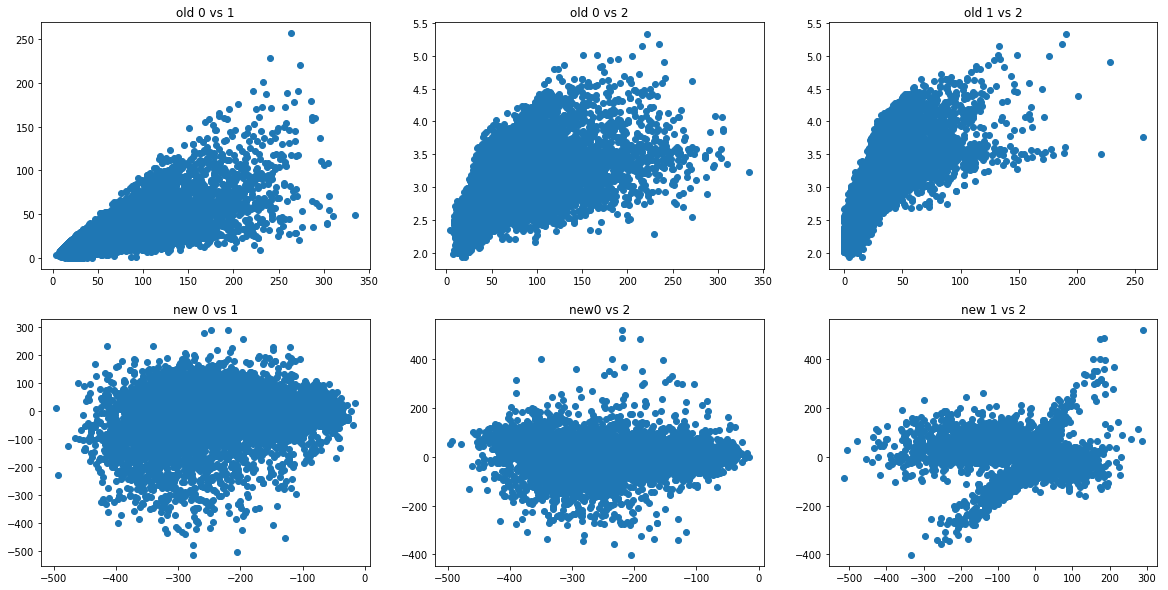

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(magic.iloc[:,0],magic.iloc[:,1])
ax[0,1].scatter(magic.iloc[:,0],magic.iloc[:,2])
ax[0,2].scatter(magic.iloc[:,1],magic.iloc[:,2])
ax[1,0].scatter(magic_rotated.iloc[:,0],magic_rotated.iloc[:,1])
ax[1,1].scatter(magic_rotated.iloc[:,0],magic_rotated.iloc[:,2])
ax[1,2].scatter(magic_rotated.iloc[:,1],magic_rotated.iloc[:,2])
ax[0,0].set_title("old {} vs {}".format(0,1))
ax[0,1].set_title("old {} vs {}".format(0,2))
ax[0,2].set_title("old {} vs {}".format(1,2))
ax[1,0].set_title("new {} vs {}".format(0,1))
ax[1,1].set_title("new{} vs {}".format(0,2))
ax[1,2].set_title("new {} vs {}".format(1,2))

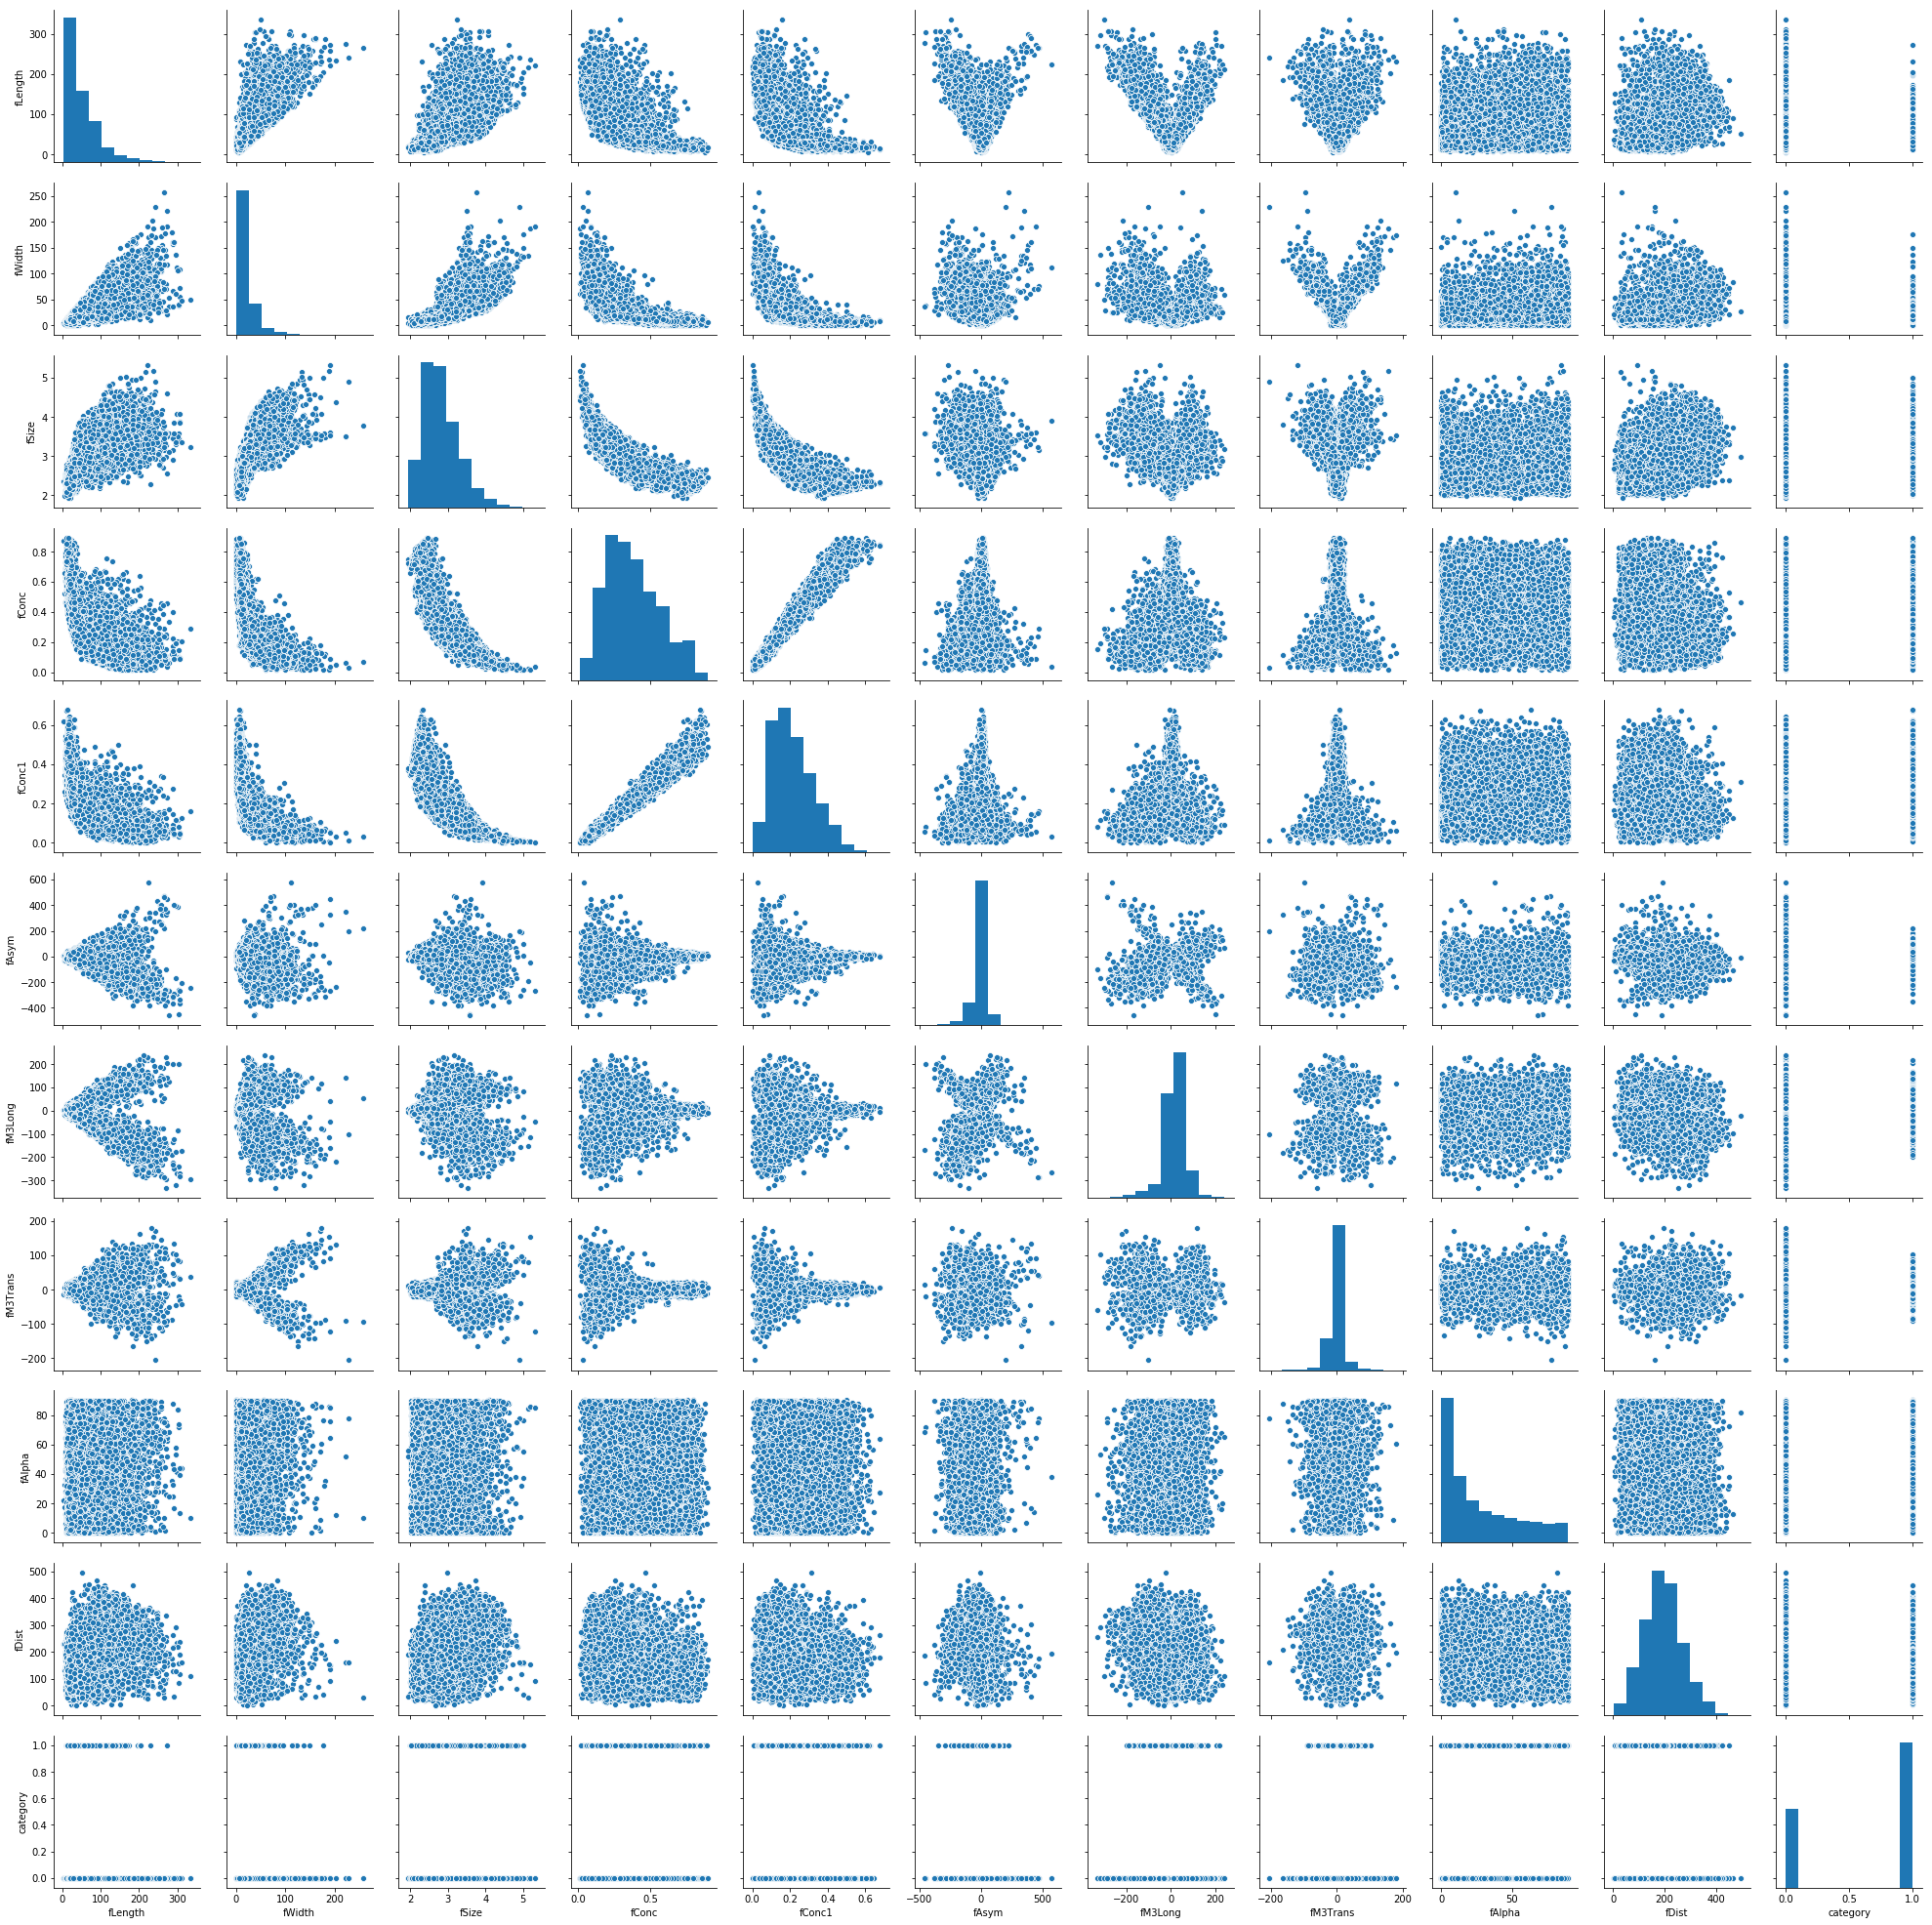

In [11]:
import seaborn as sns
sns.pairplot(magic)
#sns.pairplot(magic_rotated)

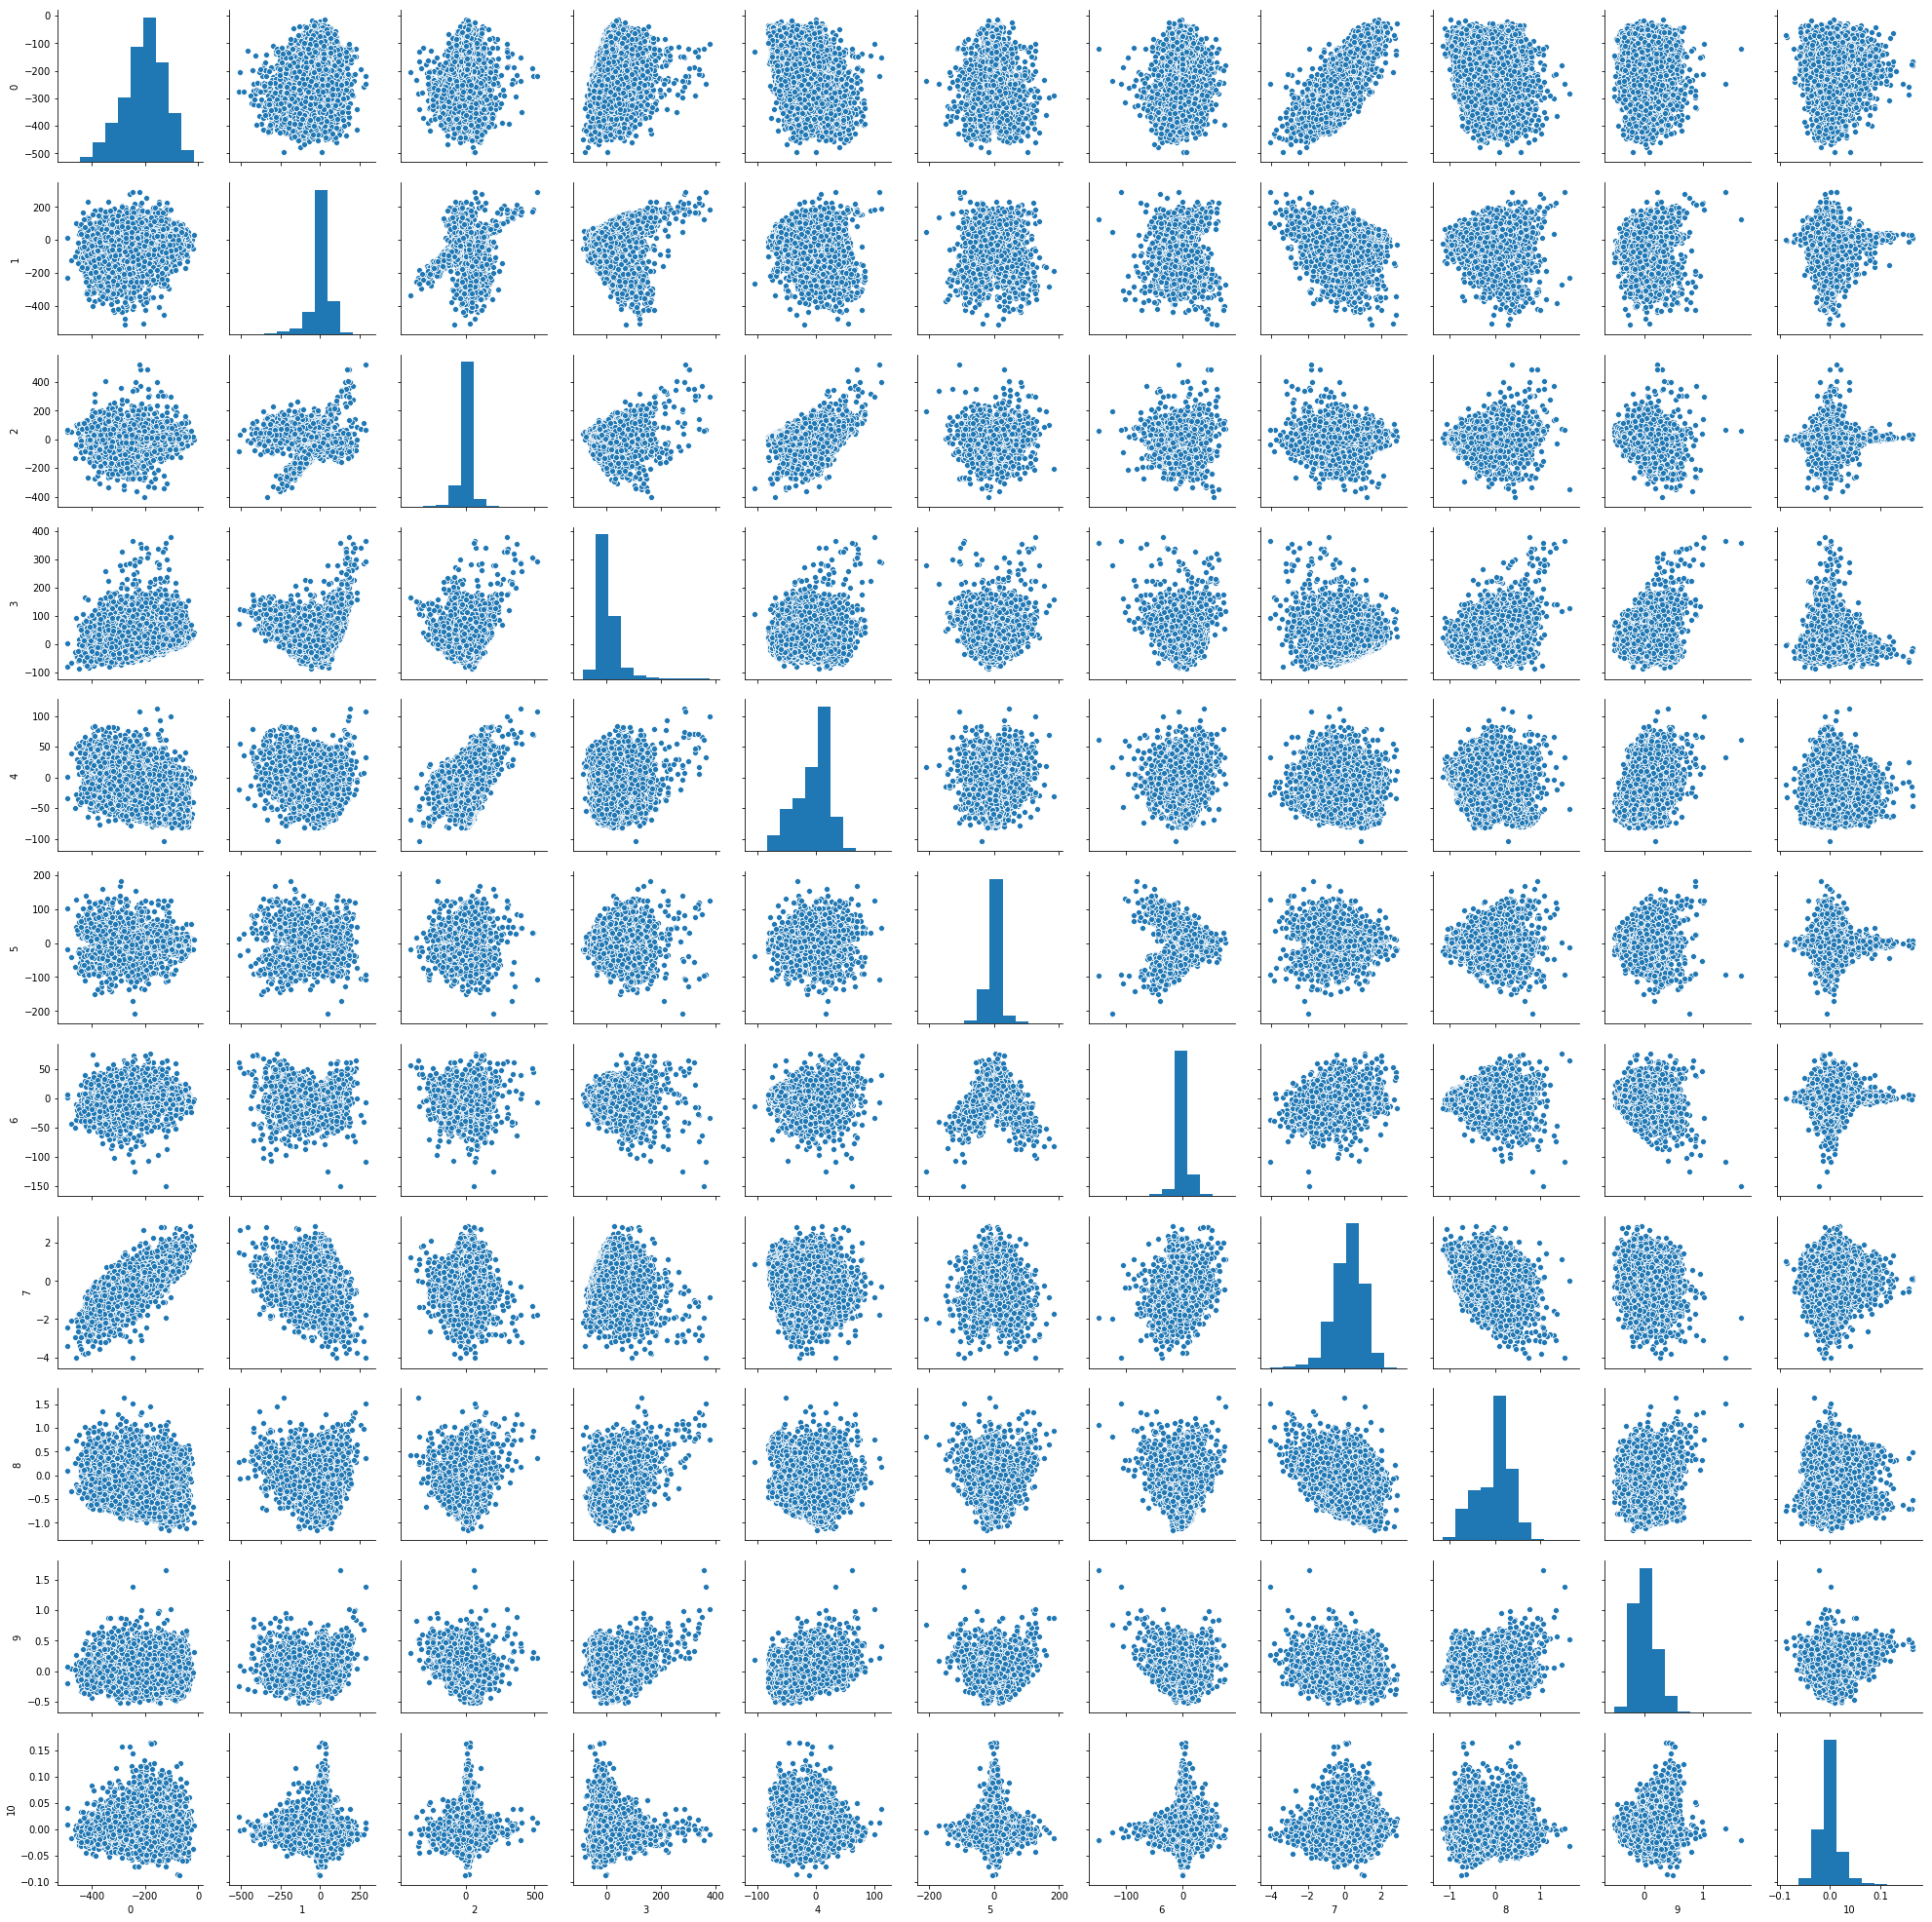

In [12]:
sns.pairplot(magic_rotated)